# 6-2 객체지향 퍼셉트론 활용
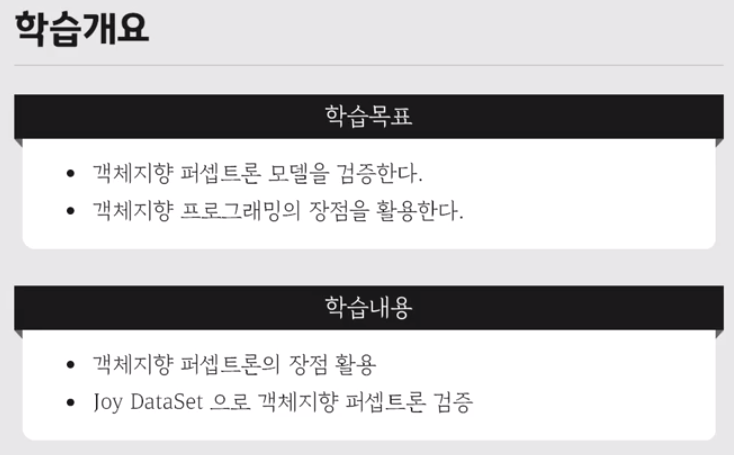

## 2.1 퍼셉트론 객체: 자료읽어오기

다음 셀에 있는 명령어들(`!cat`, `!head 혹은 !tail `)이 Windows환경에서는 작동하지 않을 수 있습니다. 두 가지 해결 방안이 있습니다. 

- 첫째는 다음과 같이 실행하십시오.
```
!type joy_data.txt
```

- 둘째 방법은 파이썬 배포판 중에 하나인 아나콘다에 있는 conda코맨드를 이용해서 유닉스 코맨드 환경을 설치하는 것입니다. 먼저 관리자 모드로 윈도우의 파워쉘(Powershell) 이나 코멘드(cmd)창을 시작하여 다음 코맨드를 실행합니다. (몇 분의 시간이 걸립니다)

```
conda install posix
``` 

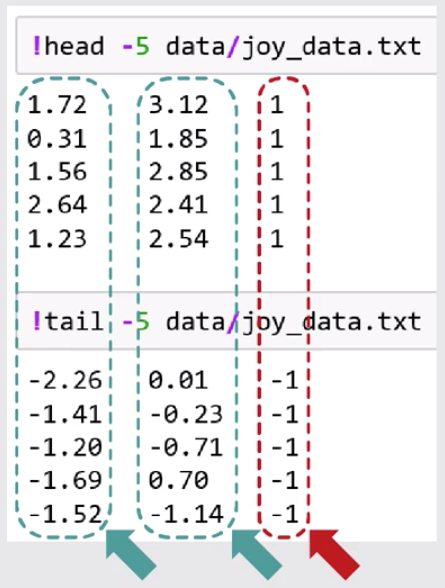

첫 두 열은 입력 자료의 특성 값이고,  
마지막 열은 클래스 레이블이다.

In [1]:
!head -5 data/joy_data.txt

1.72	3.12	1
0.31	1.85	1
1.56	2.85	1
2.64	2.41	1
1.23	2.54	1


In [2]:
!tail -5 data/joy_data.txt

-2.26	0.01	-1
-1.41	-0.23	-1
-1.20	-0.71	-1
-1.69	0.70	-1
-1.52	-1.14	-1


In [5]:
import joy
X, y = joy.joy_data()
# joy.joy_data() 는 조이 데이터 텍스트 파일을 읽고, 입력값 X와 클래스 레이블 y로 정리하여 반환하는 함수이다.

print('X.shape={}, y.shape={}'.format(X.shape, y.shape))
print(X[:5], y[:5])
print(X[-5:], y[-5:])

# 특성 자료 X는 2개씩 총 100개의 샘플이 존재하고, 
# 클래스 레이블 y는 1이나 -1 값임을 알 수 있다.
# 또한 클래스 레이블을 보면, 셔플링이 필요한 것을 알 수 있다.

X.shape=(100, 2), y.shape=(100,)
[[1.72 3.12]
 [0.31 1.85]
 [1.56 2.85]
 [2.64 2.41]
 [1.23 2.54]] [1 1 1 1 1]
[[-2.26  0.01]
 [-1.41 -0.23]
 [-1.2  -0.71]
 [-1.69  0.7 ]
 [-1.52 -1.14]] [-1 -1 -1 -1 -1]


## 2.2 자료 전처리

In [4]:
X, y = joy.joy_data()
print(X[:5], y[:5])

[[1.72 3.12]
 [0.31 1.85]
 [1.56 2.85]
 [2.64 2.41]
 [1.23 2.54]] [1 1 1 1 1]


In [11]:
# 표준화가 필요하면 , standardized = True
# 셔플링이 필요하면, shuffled = True

X, y = joy.joy_data(standardized = True, shuffled = True)
print(X[:5], y[:5])

# 아래를 보면 클래스 레이블들이 달라졌고, 
# 특성 값들의 범위 또한 조정이  된 것을 알 수 있다.

[[-1.28409207 -1.15278304]
 [-1.43790346 -0.83714568]
 [ 0.41249418  0.10034442]
 [-1.37731109 -1.63330561]
 [-0.0769057  -1.03500791]] [-1 -1  1 -1 -1]


## 2.3 학습

In [13]:
# Implementation of Rosenblatt's perceptron algorithm for classification.
# Author: Youngsup KIm, idebtor@gmail.com
# 2018.03.01 - Creation
# 2018.04.18 - works with plot_descision_region(), net_input() modified

import numpy as np
class Perceptron:
    """Perceptron classifier: This implementation of the Perceptron expects 
    binary class labels in {0, 1}.
    
    Parameters
        eta : float (default: 0.1), Learning rate (between 0.0 and 1.0)
        epochs : int (default: 10), Number of passes over the training dataset.
            Prior to each epoch, the dataset is shuffled to prevent cycles.
        random_seed : int, Random state for initializing random weights and shuffling.
        
        X0: If True, then X must have X_0 = 1 in all samples.
                Set it Faslse, if X does not have X_0 
    
    Attributes
        w  : 1d-array, shape={n_features, }, Model weights after fitting. Includes bias
        w_ : 2d-array, shape={epochs, n_features}, Weights in every epoch
        cost_ : list, Number of misclassifications in every epoch.

    """
    def __init__(self, eta = 0.1, epochs = 10, random_seed = 1): # 생성자
        self.eta = eta
        self.epochs = epochs
        self.random_seed = random_seed
        
    def fit(self, X, y, X0 = False):                             # 학습메소드
        if X0 == False:
            X = np.c_[np.ones(len(y)), X]
        np.random.seed(self.random_seed)
        self.w = np.random.random(X.shape[1])
            
        self.maxy, self.miny = y.max(), y.min()
        self.cost_ = []
        self.w_ = np.array([self.w])
            
        for i in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                yhat = self.activate(xi)
                delta = self.eta * (yi - yhat) * xi
                self.w = self.w + delta
                if (yi != yhat): errors += 1
            self.cost_.append(errors)
            self.w_ = np.vstack([self.w_, self.w])
        return self
    
    def net_input(self, X):                                     # 순입력메소드 
        if X.shape[0] == self.w.shape[0]:
            z = np.dot(self.w.T, X)
        else:
            z = np.dot(X, self.w[1:]) + self.w[0]
        return z
    
    def activate(self, X):                                     # 활성화메소드 
        mid = (self.maxy + self.miny) / 2
        return np.where(self.net_input(X) > mid, self.maxy, self.miny)
    
    def predict(self, X):                                     # 예측메소드
        return self.activate(X)

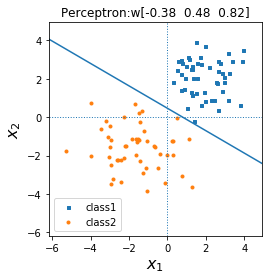

In [23]:
import joy
X, y = joy.joy_data() # 다른 데이터를 넣어볼 수 있다

ppn = Perceptron(eta = 0.1, epochs = 10) # 학습률 0.1, 반복횟수 10
ppn.fit(X, y)

joy.plot_xyw(X, y, ppn.w)

## 3.1 객체지향 퍼셉트론 활용: OOP 장점

In [24]:
def joy_Ndata(standardized=False, shuffled=False):
    return joy.getXy('data/joy_dataNoise.txt', standardized, shuffled)

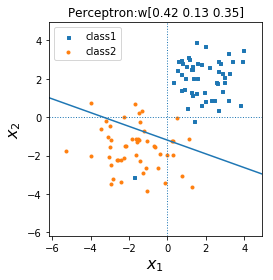

In [35]:
#X, y = joy.joy_Ndata()
X, y = joy_Ndata() 
ppn = Perceptron(eta = 0.1, epochs = 10)
ppn.fit(X, y)
joy.plot_xyw(X, y, ppn.w)

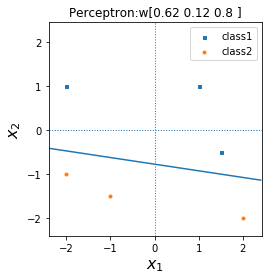

In [46]:
import joy
X, y = joy.toy_data()
ppn = Perceptron(eta = 0.1, epochs = 10)
ppn.fit(X, y)
joy.plot_xyw(X, y, ppn.w)

## 3.2 반복학습과 오류

Text(0,0.5,'Misclassified Samples')

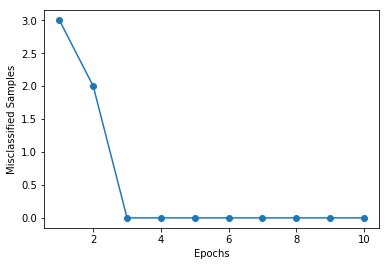

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, len(ppn.cost_) + 1), ppn.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Misclassified Samples')

# 그래프를 보면 3번째 에폭부터 학습자료를 완벽히 분류하고 있음을 볼 수 있다.
# 이런 경우 3번 이상 학습을 반복할 필요는 없지만, 
# 경우마다 다 달라서 일반화할 수 없다. 

## 3.3 가중치 변화 추적

함수 plot_xyw()는 동일한 코드로 joy 모듈과 code 폴더에도 plot_xyw.py 이름으로 존재합니다.  사용자가 편한대로 사용하면 됩니다. 
joy 모듈을 사용하려면, 다음과 같이 joy 모듈을 import해야 합니다. 

    import joy
    joy.plot_xyw(X, y, ppn.w_)

code 폴더에 있는 코드를 사용하려면, 다음과 같이 함수를 load해야 합니다. 

    %load code/plot_xyw.py
    plot_xyw(X, y, ppn.w_)


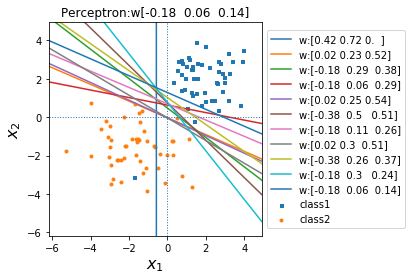

In [41]:
X, y = joy.getXy('data/joy_dataNoise.txt')
ppn = Perceptron(eta = 0.1, epochs = 10)
ppn.fit(X,y)
joy.plot_xyw(X, y, ppn.w_)

## 3.4 다양한 Joy 모듈 기능

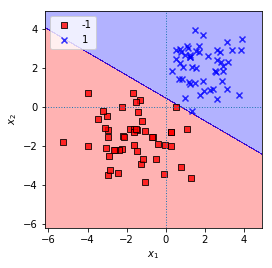

In [48]:
import joy
X, y = joy.joy_data()
ppn = Perceptron(eta = 0.1, epochs = 10)
ppn.fit(X, y)
joy.plot_decision_regions(X, y, ppn)

# plot_xyw와는 다르게 퍼셉트론 객체 자체를 넘겨받고 있다.
# 매개변수로 객체가 전달되면, 함수 안에서 객체의 모든 인스턴스 변수들과 메소들까지도 다 사용할 수 있게 된다.